##### Copyright 2023 The Cirq Developers

In [3]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Getting set up to use Google's quantum processors

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://quantumai.google/cirq/tutorials/google/start"><img src="https://quantumai.google/site-assets/images/buttons/quantumai_logo_1x.png" />View on QuantumAI</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/quantumlib/Cirq/blob/master/docs/tutorials/google/start.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/colab_logo_1x.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/quantumlib/Cirq/blob/master/docs/tutorials/google/start.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/github_logo_1x.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/Cirq/docs/tutorials/google/start.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/download_icon_1x.png" />Download notebook</a>
  </td>
</table>

## Setup
Note: this notebook relies on unreleased Cirq features. If you want to try these features, make sure you install cirq via `pip install cirq-google --pre`.

In [2]:
try:
    import cirq
    import cirq_google as cg
except ImportError:
    print("installing cirq-google and cirq...")
    !pip install --quiet cirq-google --pre cirq --pre
    print("installed cirq-google and cirq.")
    import cirq
    import cirq_google as cg

installing cirq-google and cirq...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 598.8/598.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.1/66.1 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.6/596.6 kB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.8/223.8 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 20.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 77.8 MB/s 

Access to Google's quantum processors is mediated through the Quantum Engine service. This notebook is a tutorial to get you started with the typical setup, using the open source Python framework [Cirq](https://github.com/quantumlib/Cirq), in the free cloud Jupyter notebook environment, [Google Colab](https://colab.research.google.com/).

Access is currently restricted to those in an approved group, and you must be in that group before running this tutorial.

You can find more about running this in colaboratory in the [Colab documentation](https://colab.research.google.com/notebooks/welcome.ipynb) or in our Cirq-specific guide to [running in Colab](colab.ipynb).  You can download this notebook from the [GitHub repository](https://github.com/quantumlib/Cirq/blob/master/docs/tutorials/google/start.ipynb).

## Before you begin

*  First, decide whether you want to [create a new Google Cloud Platform project](https://cloud.google.com/docs/overview/), or use an existing one.
*  Follow this link to [**enable the Quantum Engine API**](https://console.cloud.google.com/apis/library/quantum.googleapis.com?returnUrl=quantum) in your Google Cloud Platform project.

After the API is enabled, you should be redirected to the [Quantum Engine console](https://console.cloud.google.com/quantum) and it should look like the following screenshot.

![Quantum Engine landing](https://raw.githubusercontent.com/quantumlib/Cirq/master/docs/images/console-landing.png)

**Enter your project id into the input text box below**. To find your project id, click on the project menu in the blue bar at the top of the console. This will open a menu that displays your project name (e.g. "My project") and unique **project id** (e.g. my-project-1234). Enter the **project id** into the input below. ([Help on finding your project id](https://cloud.google.com/resource-manager/docs/creating-managing-projects#identifying_projects).)

![Find project id](https://raw.githubusercontent.com/quantumlib/Cirq/master/docs/images/console-project-id.png)

**Run the code in the next block (the one with the text box)**, which will prompt you to authenticate Google Cloud SDK to use your project.  After running the block, you will see a link which you should click.  This will open a new browser window.  Follow the authentication flow for this window.  If you see "Authentication complete" you have done this step successfully. Contact your partner in the Quantum Hardware Residency Program if you encounter issues at this stage.

![Run code block below](https://raw.githubusercontent.com/quantumlib/Cirq/master/docs/images/run-code-block.png)

In [4]:
# The Google Cloud Project id to use.
project_id = "" #@param {type:"string"}

from cirq_google.engine.qcs_notebook import get_qcs_objects_for_notebook
# For virtual engine instances, set 'virtual=True' below.
qcs_objects = get_qcs_objects_for_notebook(project_id)

engine = qcs_objects.engine
if not qcs_objects.signed_in:
    print("ERROR: Please setup project_id in this cell or set the `GOOGLE_CLOUD_PROJECT` env var to your project id.")
    print("Using noisy simulator instead.")


Getting OAuth2 credentials.
Press enter after entering the verification code.
None
Authentication complete.
Unable to connect to quantum engine: Unable to determine project id. Please set environment variable GOOGLE_CLOUD_PROJECT or configure default project with `gcloud set project <project_id>`.
Using a noisy simulator.
Available processors: ['rainbow', 'weber']
Using processor: rainbow
ERROR: Please setup project_id in this cell or set the `GOOGLE_CLOUD_PROJECT` env var to your project id.
Using noisy simulator instead.


**Authentication details**

Double clicking on the project_id block above will expose the code that is run when you run this code block.  This code ensures that *Application Default Credentials* are set and can be used in Cirq to authenticate your calls to Quantum Engine.

If you are going to run code outside of colab and want to authenticate, see the below section on running from the command-line.

## Create a circuit
Now, let's create a basic program with Cirq. After reviewing the code, **run this block** to run a circuit, and print a circuit diagram and results. To learn more, refer to the [Cirq overview](https://quantumai.google/cirq) and [Cirq basics](https://quantumai.google/cirq/start/basics) pages.

In [5]:
# Define a qubit at an arbitrary grid location.
qubit = cirq.GridQubit(0, 0)

# Create a circuit (qubits start in the |0> state).
circuit = cirq.Circuit(
    cirq.X(qubit),                     # NOT gate.
    cirq.measure(qubit, key='result')  # Measurement.
)

print("Circuit:")
print(circuit)

Circuit:
(0, 0): ───X───M('result')───


## Simulate the circuit using Cirq

Let's quickly use Cirq to simulate the circuit above.

In [6]:
# Simulate the circuit, repeating 1000 times.
print("Simulating circuit using Cirq...\n")
results = cirq.sample(circuit, repetitions=1000)
print("Measurement results:")
print(results)

Simulating circuit using Cirq...

Measurement results:
result=11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111

## Run on quantum hardware
Approved users have access to a processor in "open-swim" mode that runs jobs on a first-in-first-out basis per user, with a fairness algorithm that balances jobs across users. To see which processors you have access to, you can either visit the [Cloud Console](https://console.cloud.google.com/quantum/processors) or call `list_processors()` on an `Engine` object.

### Create a Quantum Engine client
Interactions with hardware are facilitated by the Quantum Computing Service. A client must first be initialized with your Google Cloud project to perform these interactions.

You can create a client to the service as follows:

`engine = cg.Engine(project_id=YOUR_PROJECT_ID)`

Note: for this tutorial, we already initialized a variable `engine`.

### Select a quantum processor
Before running an experiment, you must first specify the processor on which you'd like to run. Please work with your internal point-of-contact to help decide which processor is most appropriate and to set expectations for how to best collaborate on the device.

You can view the processors available to you in the [Cloud Console](https://console.cloud.google.com/quantum/processors) or with a call to `engine.list_processors()`.

In [7]:
processors = [p.processor_id for p in engine.list_processors() if p.health() == 'OK']

After selecting your device, enter its ID in the following code block and run it as well.

![Run code block below](https://raw.githubusercontent.com/quantumlib/Cirq/master/docs/images/run-code-block.png)


In [8]:
processor_id = "" #@param {type:"string"}

### View the processor's topology
Each processor has a set of available qubits laid out on a grid with limited couplings between qubits. The device specification can be printed to inspect the topology of a processor.

In [9]:
id = processor_id or processors[0]
processor = engine.get_processor(id)

# Print the device showing qubit connectivity.
device = processor.get_device()
print(device)

                  (3, 2)
                  │
                  │
         (4, 1)───(4, 2)───(4, 3)
         │        │        │
         │        │        │
(5, 0)───(5, 1)───(5, 2)───(5, 3)───(5, 4)
         │        │        │        │
         │        │        │        │
         (6, 1)───(6, 2)───(6, 3)───(6, 4)───(6, 5)
                  │        │        │        │
                  │        │        │        │
                  (7, 2)───(7, 3)───(7, 4)───(7, 5)───(7, 6)
                           │        │        │
                           │        │        │
                           (8, 3)───(8, 4)───(8, 5)
                                    │
                                    │
                                    (9, 4)


Note that the qubit that we used for the simulation above, `(0, 0)`, does not exist on the hardware. Since the grid of available qubits may change over time, we'll programatically select a valid qubit by inspecting `device.qubits`. We then use the `transform_qubits()` method to remap the circuit onto that qubit.

In order to run on hardware, we must also ensure that the circuit only contains gates that the hardware supports. The basic gates used here are always available, so this circuit can be run without any further changes, but in general you may need to apply additional transformations before running arbitrary circuits. See the [best practices](https://quantumai.google/cirq/google/best_practices) guide for more information about running circuits on hardware.

In [10]:
valid_qubit = sorted(device.metadata.qubit_set)[0]

# Transform circuit to use an available hardware qubit.
hw_circuit = circuit.transform_qubits(lambda q: valid_qubit)

print(hw_circuit)

(3, 2): ───X───M('result')───


Among these best practices, we will highlight two important ones.

First, if your circuit uses more than one qubit, you can map the circuit onto the grid of the quantum processor in a way that accounts for its topology. You can do this as follows:

In [11]:
device_graph = device.metadata.nx_graph
router = cirq.RouteCQC(device_graph)
hw_circuit = router(circuit)
print(hw_circuit)

(5, 4): ───X───M('result')───


Second, if your quantum processor is calibrated to do a specific set of gates, you will need to transform your circuit into that gateset. For example, for a CZ gateset, you can do the following.

Other gatesets and considerations are included in the [best practices guide](https://quantumai.google/cirq/google/best_practices).

In [12]:
gateset = cirq.CZTargetGateset(allow_partial_czs=True)
hw_circuit = cirq.optimize_for_target_gateset(hw_circuit, gateset=gateset)
print(hw_circuit)

(5, 4): ───PhXZ(a=0,x=1,z=0)───M('result')───


### Sample from a circuit on the Quantum Engine

Experiments can be performed  on the Quantum Computing Service by _sampling_ from a circuit. A [`Sampler`](https://quantumai.google/reference/python/cirq/Sampler) encapsulates the setup details of an experiment. You can retrieve a Sampler from the Processor object we created above to collect samples from that processor.

An un-parameterized call to `get_sampler()` will run with that processor's default configuration, but we support custom device layouts and calibrations to achieve the highest possible performance on the device for a given experiment. To use these features today, you'll need to work with an internal partner to supply you with the necessary configurations.

In [13]:
sampler = processor.get_sampler(
    # Get these values from an internal partner:
    # device_config_name='layout_42',
    # run_name='2023.11.06-1.0',
)


The execution of your experiment will likely be completed within a few seconds and the results will be displayed below. The output will include a link to the [console](https://console.cloud.google.com/quantum), where you can track the status and results of "jobs" spawned by your experiments.

Scheduling execution on the Quantum Engine...

You can view jobs at: https://console.cloud.google.com/quantum/jobs?project=



<Axes: title={'center': 'Result State Histogram'}, xlabel='qubit state', ylabel='result count'>

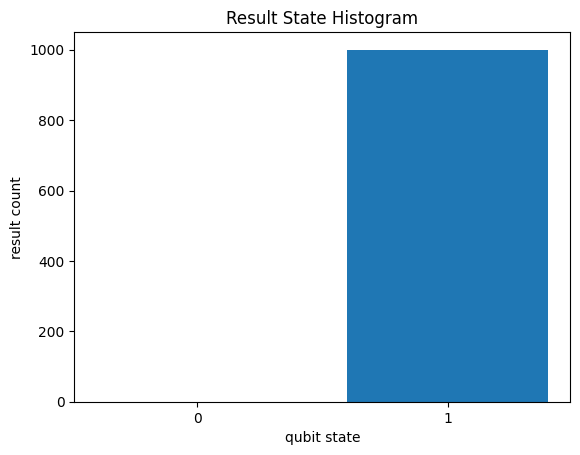

In [14]:
print("Scheduling execution on the Quantum Engine...\n")
print("You can view jobs at: https://console.cloud.google.com/quantum/"
      "jobs?project={}\n".format(project_id))

# Print out the results. This blocks until the results are returned.
results = sampler.run(hw_circuit, repetitions=1000)
cirq.plot_state_histogram(results)

## Running from the command line

If you are planning to access Quantum Computing Service from the command line, follow these instructions to get started.  If you plan on executing all of your programs from an ipython notebook, you can skip this section.

### Setup Cirq

Follow the [Cirq Install](https://quantumai.google/cirq/start/install) page to install Cirq locally. We highly recommend that you setup a Python virtual environment for this installation to isolate your development stack from your overall system installations. Make sure to setup the virtual environment for Python 3 and not Python 2.

### Setup Google Cloud authentication

In this quickstart we will authenticate using the gcloud command line cool.  To do this, one must first install gcloud.  Follow the instructions for this at https://cloud.google.com/sdk/install. We will authenticate using Application Default Credentials.  To do this simply run the following on your shell command line

`gcloud auth application-default login`

This will open up a browser window or give you a link to a webpage you can navigate to in order to go through an authentication flow.  Complete this using your Google account.  After this command is run, credentials will be stored on your local machine.  If at any point you want to revoke these credentials you can run `gcloud auth application-default revoke`. These credendtials typically
need to be renewed once each day.

### Write and run a short quantum program

Using your favorite IDE or editor, read and then paste the following hello_qubit program into a file called `hello_qubit.py`.  Make sure to replace the `'your-project-id'` string with the project id you created above.


In [15]:
import cirq
import cirq_google as cg

def example(engine, processor_id):
    """Hello qubit example run against a quantum processor."""

    # Define a qubit on the device.
    processor = engine.get_processor(processor_id)
    qubit = sorted(processor.get_device().metadata.qubit_set)[0]

    # Create a circuit (qubits start in the |0> state).
    circuit = cirq.Circuit(
        cirq.X(qubit)**0.5,                # Square root of NOT.
        cirq.measure(qubit, key='result')  # Measurement.
    )

    sampler = processor.get_sampler()
    print("Sampling circuit on Quantum Engine...\n")
    results = sampler.run(circuit, repetitions=1000)

    print("\nMeasurement results:")
    print(results)

if __name__ == '__main__':
    # Set up QCS objects.
    from cirq_google.engine.qcs_notebook import get_qcs_objects_for_notebook
    qcs_objects = get_qcs_objects_for_notebook(project_id='')
    processor_id = qcs_objects.processor_id
    engine = qcs_objects.engine

    example(engine, processor_id)

Getting OAuth2 credentials.
Press enter after entering the verification code.
None
Authentication complete.
Unable to connect to quantum engine: Unable to determine project id. Please set environment variable GOOGLE_CLOUD_PROJECT or configure default project with `gcloud set project <project_id>`.
Using a noisy simulator.
Available processors: ['rainbow', 'weber']
Using processor: rainbow
Sampling circuit on Quantum Engine...


Measurement results:
result=100000001010111100100011000010001010111011100011100101101011101011000000110010101111000111011010000101001101100111100101100010100101101111111110000110011100101101001000101000111111011000110101011111000101010111000000100101000000111010011110001110010101011100111011001110011111000101100110100010011100010110001000100010011110010101101100011011111100110111010000000101110111011001111110111011000110101100100010010100100101010001001111100101001011001011010000101101110000000010110110110101110011001010110011011011011100101011111101100000000100

Once saved, you can  run this program from the command line:

```
python hello_qubit.py
```

Upon successful completion, the script will print the sampled bitstring.

## Next steps
* Use [this template colab](https://quantumai.google/cirq/tutorials/google/colab) as a base for your own explorations.
* Explore [best practices](https://quantumai.google/cirq/google/best_practices) for getting circuits to run on hardware.
